In [2]:
import mne
import numpy as np
import pandas as pd


<frozen importlib._bootstrap>:241: RuntimeWarning: The MNE-Python config file (/home/mattbls/.mne/mne-python.json) is not a valid JSON file and might be corrupted


In [3]:
raw = mne.io.read_raw_edf('CHB-MIT/chb01_01.edf')

Extracting EDF parameters from /home/mattbls/PythonProjects/SeizureSense/CHB-MIT/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_532/394065571.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('CHB-MIT/chb01_01.edf')


In [16]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2076-11-06 11:42:54 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


Effective window size : 8.000 (s)


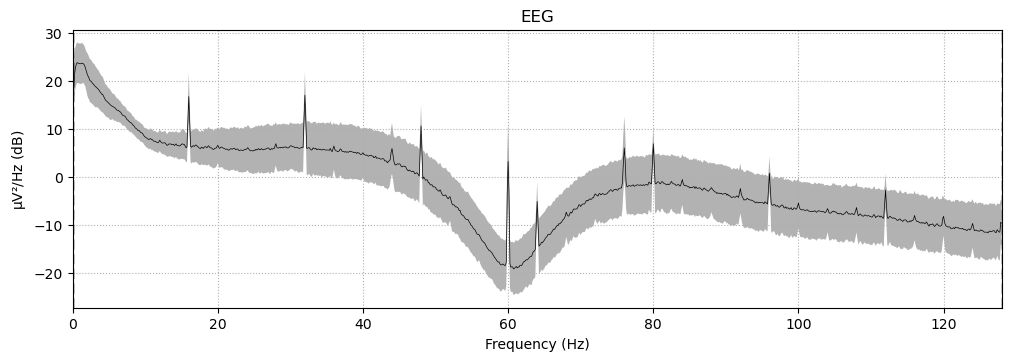

In [4]:
psd = raw.compute_psd(tmax=np.inf, fmax=128)
fig = psd.plot(average=True, picks="data", exclude="bads")

In [12]:
print(fig.axes)

[<Axes: title={'center': 'EEG'}, xlabel='Frequency (Hz)', ylabel='$\\mathrm{µV²/Hz}$$\\ \\mathrm{(dB)}$'>]


In [9]:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )